In [1]:
import os

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


In [49]:
base_dir = "/Users/szhan/Projects/tsimpute/viz/"
prefix = "sisu42_into_sisu3.imputation.results"

in_sts_csv_file = base_dir + "sts" + "." + prefix + "." + "csv"
out_sts_png_file = base_dir + "sts" + "." + prefix + "." + "png"

in_beagle_csv_file = base_dir + "beagle" + "." + prefix + "." + "csv"
out_beagle_png_file = base_dir + "beagle" + "." + prefix + "." + "png"

In [64]:
df_sts = pd.read_csv(in_sts_csv_file, comment="#")
df_beagle = pd.read_csv(in_beagle_csv_file, comment="#")

In [79]:
shared_site_pos = np.sort(list(set(df_sts["position"].to_numpy()) & set(df_beagle["position"].to_numpy())))

print(f"{df_sts.shape[0]}")
print(f"{df_beagle.shape[0]}")
print(f"{len(shared_site_pos)}")

97570
96075
96075


In [82]:
df_sts = df_sts[np.isin(df_sts["position"], shared_site_pos)]
df_beagle = df_beagle[np.isin(df_beagle["position"], shared_site_pos)]

df_sts = df_sts[["ref_minor_allele_freq", "iqs"]].dropna(axis=0)
df_beagle = df_beagle[["ref_minor_allele_freq", "iqs"]].dropna(axis=0)

In [61]:
def plot_results(df, method, out_png_file, max_maf=0.50, dpi=1000):
    values = np.vstack([df["ref_minor_allele_freq"], df["iqs"]])
    kernel = stats.gaussian_kde(values)
    x = kernel(np.vstack([df["ref_minor_allele_freq"], df["iqs"]]))

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_title(
        f"{method}: from SiSu v4.2 into SiSu v3.0",
        size=25
    )
    ax.set_xlim([0, max_maf])
    ax.set_ylabel("IQS", size=20)
    ax.set_xlabel("MAF", size=20)
    ax.tick_params(axis='both', which='major', labelsize=20)

    g = sns.scatterplot(
        y="iqs",
        x="ref_minor_allele_freq",
        data=df,
        c=x,
        cmap="viridis",
        #x_jitter=True,
        ax=ax
    );

    g.get_figure().savefig(out_png_file, dpi=dpi)

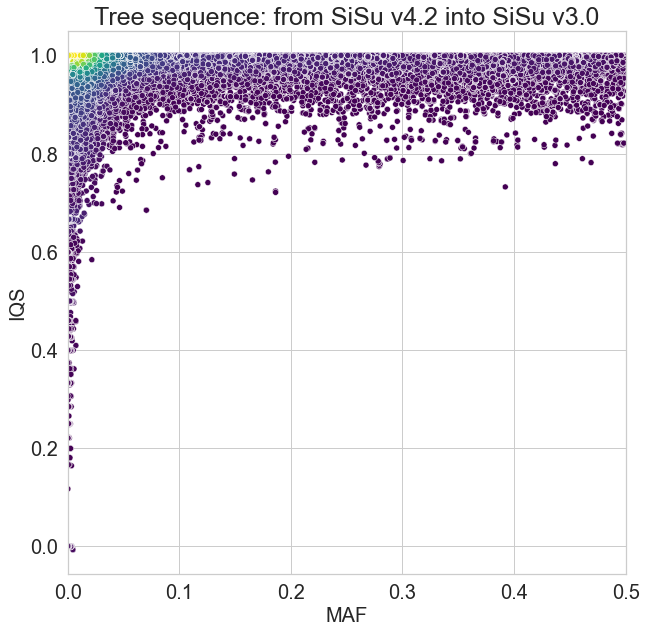

In [83]:
plot_results(df_sts, "Tree sequence", out_sts_png_file)

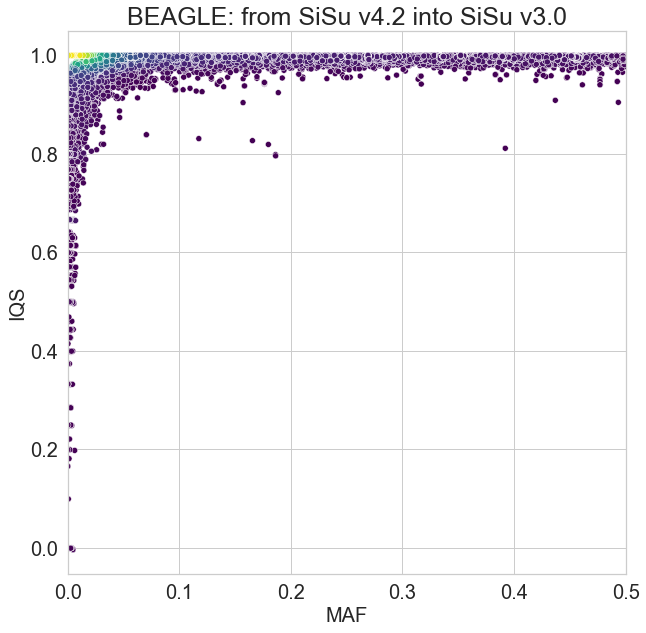

In [84]:
plot_results(df_beagle, "BEAGLE", out_beagle_png_file)

In [89]:
perc_sites_iqs_ge_90_sts = float(df_sts[df_sts["iqs"] >= 0.90].shape[0]) / float(df_sts.shape[0])
perc_sites_iqs_ge_90_beagle = float(df_beagle[df_beagle["iqs"] >= 0.90].shape[0]) / float(df_beagle.shape[0])


In [90]:
print(perc_sites_iqs_ge_90_sts)
print(perc_sites_iqs_ge_90_beagle)

0.7987926099401509
0.891064272703617


In [97]:
df_sts_rare = df_sts[df_sts["ref_minor_allele_freq"] <= 0.01]
df_beagle_rare = df_beagle[df_beagle["ref_minor_allele_freq"] <= 0.01]

df_sts_common = df_sts[df_sts["ref_minor_allele_freq"] > 0.01]
df_beagle_common = df_beagle[df_beagle["ref_minor_allele_freq"] > 0.01]

In [104]:
print(df_sts_rare[df_sts_rare["iqs"] >= 0.9].shape[0] / float(df_sts_rare.shape[0]))
print(df_beagle_rare[df_beagle_rare["iqs"] >= 0.9].shape[0] / float(df_beagle_rare.shape[0]))

0.625192858717214
0.7735067225038572


In [105]:
print(df_sts_common[df_sts_common["iqs"] >= 0.9].shape[0] / float(df_sts_common.shape[0]))
print(df_beagle_common[df_beagle_common["iqs"] >= 0.9].shape[0] / float(df_beagle_common.shape[0]))


0.9541268119514841
0.9962528350261316
